# Assignment 3 #

## The Problem ##

This is another particle physics problem. One from the research area in which I work. I am about to explain the particle physics of the problem. I will do this in person on Friday. However it really doesn't make a difference whether or not you understand the particle physics from a data science point of view so this is only for those who are interested.

## Finding Higgs decaying to $\tau$ leptons ##

The purpose of this mini project is to separate a signal (S) of Higgs bosons decaying to $\tau$ leptons from a much bigger background (B) of $Z$ bosons decaying to $\tau$ leptons i.e. to separate the processes shown below:
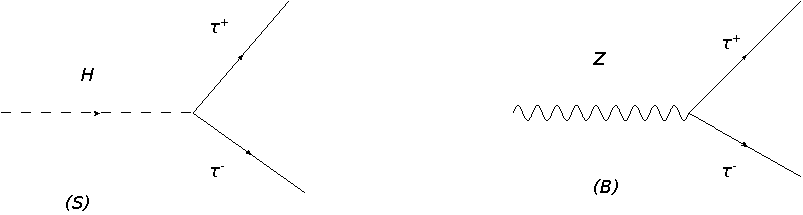

The $\tau$ leptons can then decay hadronically (h) or leptonically - so either an electron (e) or a muon ($\mu$) as shown in the  below:

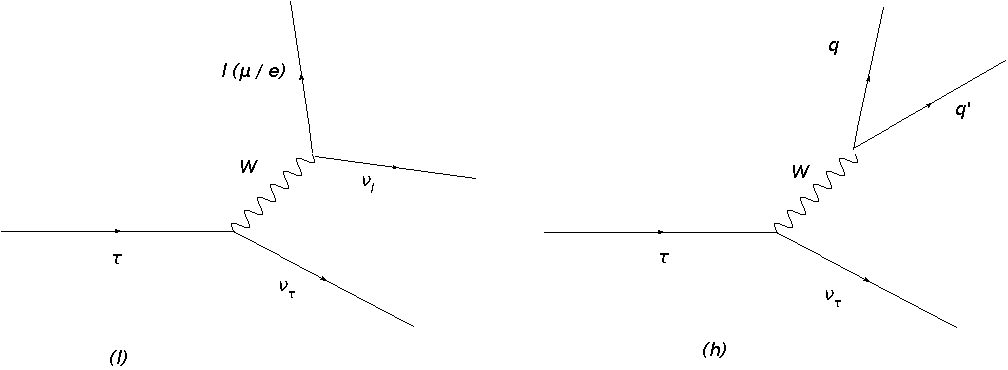

Now the Z boson has a mass of ~90GeV and the Higgs boson a mass of ~125GeV so naively you would think that this would be easy as you could just reconstruct all the particles and find the invarient mass. However, the problem is that we cannot reconstruct any of the neutrinos ($\nu$), so we have to use other variables as well.

## Production mode ##

There is a slight complication in that the Higgs can be produced in different ways. The most likely two being gluon fusion (ggH) and vector boson fusion (VBF). With ggH happening about 10 the rate of VBF, however VBF events have some topological structures that might help to identify them. The processes are shown below:

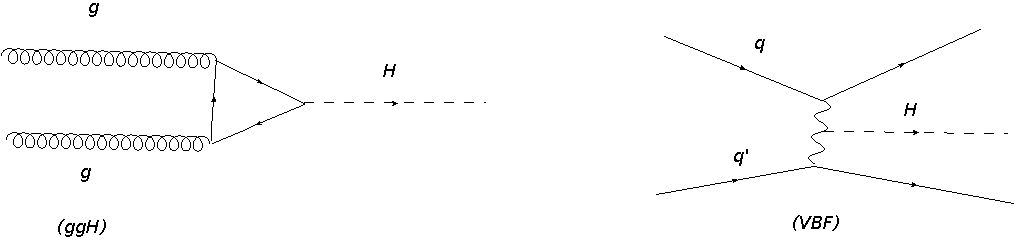



Z bosons can also be produced in different ways but the dominate way is through a Drell-Yan process (DY). 

### About 2000 Z bosons are produced for every Higgs boson that is produced ### 

## The assignment ##

We want you use simulated events to try to separate a signal Higgs bosons from a background of DY Z bosons. We will give you events separated by decay channels:  where one $\tau$ has decayed to an electron and the other hadronically (et), where one $\tau$ has decayed to a $\mu$ and the other hadronically (mt), and where both have decayed hadronically (tt). We will give you samples for different processes i.e. Z bosons (DY), Higgs from ggH and Higgs from VBF. In each of these datasets we will give a series of event variables which will explained below.

Your assignment is to produce the sample that provides the best $\dfrac{S}{\sqrt{B+S}}$ where S is the number of signal events in your selection and B is the number of background events. When calculating this you must take into account the production rates of the Higgs compared to the Z and for the Higgs the ratio that are produced by ggH and VBF. You can do this by scaling the datasets that you have by:

- DY : 8.4
- ggH: 0.034
- VBF: 0.011

In [7]:
import pandas as pd
#
# This code reads in the data that you need into pandas dataframes. It does this by channel (ch) and production 
# process (proc)
#
for ch in ["et","mt","tt"]:
    for proc in ["DY","ggH","VBF"]:
        url = "https://raw.githubusercontent.com/gputtley/ML-Assessment-3/master/{}_{}.pkl".format(ch,proc)
        df = pd.read_pickle(url) # this is currently overwriting the the same df - you will need to change this
        print(ch,proc,len(df))
        print(df.columns)
        

et DY 11905
Index(['dR', 'dijetpt', 'dphi', 'eta_1', 'eta_2', 'jdeta', 'jpt_1', 'jpt_2',
       'm_vis', 'met', 'met_dphi_1', 'met_dphi_2', 'mjj', 'mt_1', 'mt_2',
       'mt_lep', 'mt_tot', 'mva_dm_2', 'n_deepbjets', 'n_jets', 'pt_1', 'pt_2',
       'pt_tt', 'pt_vis', 'q_1', 'q_2', 'svfit_mass'],
      dtype='object')
et ggH 22005
Index(['dR', 'dijetpt', 'dphi', 'eta_1', 'eta_2', 'jdeta', 'jpt_1', 'jpt_2',
       'm_vis', 'met', 'met_dphi_1', 'met_dphi_2', 'mjj', 'mt_1', 'mt_2',
       'mt_lep', 'mt_tot', 'mva_dm_2', 'n_deepbjets', 'n_jets', 'pt_1', 'pt_2',
       'pt_tt', 'pt_vis', 'q_1', 'q_2', 'svfit_mass'],
      dtype='object')
et VBF 5847
Index(['dR', 'dijetpt', 'dphi', 'eta_1', 'eta_2', 'jdeta', 'jpt_1', 'jpt_2',
       'm_vis', 'met', 'met_dphi_1', 'met_dphi_2', 'mjj', 'mt_1', 'mt_2',
       'mt_lep', 'mt_tot', 'mva_dm_2', 'n_deepbjets', 'n_jets', 'pt_1', 'pt_2',
       'pt_tt', 'pt_vis', 'q_1', 'q_2', 'svfit_mass'],
      dtype='object')
mt DY 88916
Index(['dR', 'dijetpt', 'dp

In [8]:
display(df)

,dR,dijetpt,dphi,eta_1,eta_2,jdeta,jpt_1,jpt_2,m_vis,met,...,mva_dm_2,n_deepbjets,n_jets,pt_1,pt_2,pt_tt,pt_vis,q_1,q_2,svfit_mass
0,2.245191,46.338856,-2.069544,0.801993,-0.068564,3.508492,35.402210,32.017943,108.407365,9.081019,...,2.0,0.0,2.0,60.728566,51.404032,52.092040,57.826988,-1.0,1.0,116.727688
1,2.432736,57.427383,-2.343614,1.123086,0.470647,4.590855,33.370474,28.407197,120.725692,39.465305,...,10.0,0.0,1.0,67.176678,56.528884,33.259151,49.049369,1.0,-1.0,130.009163
2,0.849998,253.159698,0.849740,0.040834,0.019877,2.800241,150.040278,115.509375,83.695256,34.003727,...,1.0,0.0,2.0,115.016574,89.513942,220.201665,186.642472,1.0,-1.0,99.396744
3,1.708500,106.487076,-1.701305,-1.128812,-0.972182,1.990790,107.738793,24.302023,89.045539,20.870726,...,11.0,0.0,1.0,70.580897,49.156565,101.156770,80.591541,1.0,-1.0,105.842022
4,1.011177,225.490051,-0.948522,0.895766,0.545360,4.497031,188.692418,66.274516,104.375203,9.291633,...,1.0,0.0,2.0,156.994622,72.380800,199.368587,207.685794,1.0,-1.0,112.447273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,1.529943,137.318451,0.948115,0.011762,-1.188991,3.234070,135.026184,103.813341,97.718282,13.538326,...,11.0,1.0,2.0,67.089822,57.876824,114.434621,111.265273,1.0,-1.0,110.561348
26699,0.758009,323.968140,0.242713,-0.633423,-1.351523,4.542929,354.518246,30.821494,66.005667,119.124641,...,1.0,0.0,2.0,133.355762,54.547144,305.888963,186.764781,-1.0,1.0,82.418282
26700,1.285565,180.869003,0.237660,-0.300596,0.962810,4.390220,242.853100,138.779621,77.003886,57.129520,...,0.0,0.0,2.0,59.438909,53.165954,168.383622,111.813246,-1.0,1.0,114.308075
26701,1.531036,122.459404,-1.372918,-1.231522,-0.553904,3.857158,158.322015,76.732352,121.099956,33.219570,...,0.0,0.0,2.0,88.316929,79.664219,97.261284,130.048299,-1.0,1.0,130.435310


## Variables Definitions
If a variable shown below ends with {1,2}, this means that the variable exists for both the tau decay products 1 and 2. 1 refers to the leading transverse momentum hadronic tau in tt channel and the electron or muon in the et or mt channel. 2 refers to the subleading transverse momentum hadronic tau in tt channel and the hadronic tau in the et and mt channel.

- dR: Distance between the two tau decay products.
- dijetpt: Total transverse momentum of the two highest transverse momentum jets in the event.
- dphi: The angle phi between the two tau decay products.
- eta_{1,2}: The detector eta of the tau decay products.
- jdeta: The eta between the two highest transverse momentum jets in the event.
- jpt_1: The transverse momentum of the leading transverse momentum jet in the event.
- jpt_2: The transverse momentum of the subleading transverse momentum jet in the event.
- m_vis: The reconstructed mass of the visibile ditau decay products.
- met: The missing transverse energy in the event.
- met_dphi_{1,2}: The angle phi between the met and the tau decay product. 
- mjj: The reconstructed mass of the two highest transverse momentum jets in the event.
- mt_{1,2}: The transverse mass between the met and the tau decay product.
- mt_lep: The transverse mass between the two tau decay products.
- mt_tot: The sum in quadrature of mt_1, mt_2 and mt_lep.
- mva_dm_{1,2}: The predicted decay mode of the hadronic tau (1 only available for tt channel).
- n_deepbjets: The number of b tagged jets in the event.
- n_jets: The number of jets in the events.
- pt_{1,2}: The transverse momentum of the tau decay product.
- pt_tt: The reconstructed ditau + met transverse momentum.
- pt_vis: The reconstructed ditau transverse momentum.
- q_{1,2}: The charge of the tau decay product.
- svfit_mass: A likihood reconstruction of the ditau mass.

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
# scaling the datasets
DY_scale = 8.4 
ggH_scale = 0.034 
VBF_scale = 0.011

In [13]:
# label
DY_label = 0 
ggH_label = 1 
VBF_label = 1

In [16]:
variables = ['dR', 'dijetpt', 'dphi', 'eta_1', 'eta_2', 'jdeta', 'jpt_1', 'jpt_2', 'm_vis', 
             'met', 'met_dphi_1', 'met_dphi_2', 'mjj', 'mt_1', 'mt_2', 'mt_lep', 'mt_tot',
             'n_deepbjets', 'n_jets', 'pt_1', 'pt_2', 'pt_tt', 'pt_vis', 'svfit_mass']


In [18]:
channels = ['et', 'mt', 'tt']

In [21]:
# 定义一个函数，用于读取数据并合并为一个数据框
def read_data(channels, variables):
    # 创建一个空的数据框
    df = pd.DataFrame()
    # 对每个衰变通道，读取信号和背景的数据，并添加标签和缩放因子
    for ch in channels:
        for proc, scale, label in zip(['DY', 'ggH', 'VBF'], [DY_scale, ggH_scale, VBF_scale], [DY_label, ggH_label, VBF_label]):
            url = "https://raw.githubusercontent.com/gputtley/ML-Assessment-3/master/{}_{}.pkl".format(ch, proc)
            tmp = pd.read_pickle(url)
            tmp = tmp[variables] # 选择要使用的变量
            tmp['channel'] = ch # 添加衰变通道
            tmp['process'] = proc # 添加产生过程
            tmp['weight'] = scale # 添加缩放因子
            tmp['label'] = label # 添加标签
            # 使用concat方法来合并数据，而不是append方法
            df = pd.concat([df, tmp]) # 将数据追加到数据框
    return df


In [22]:
df = read_data(channels, variables)
# 查看数据的基本信息
df.info()

# 查看数据的前五行
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 390153 entries, 0 to 26702
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dR           390153 non-null  float64
 1   dijetpt      390153 non-null  float32
 2   dphi         390153 non-null  float64
 3   eta_1        390153 non-null  float64
 4   eta_2        390153 non-null  float64
 5   jdeta        390153 non-null  float64
 6   jpt_1        390153 non-null  float64
 7   jpt_2        390153 non-null  float64
 8   m_vis        390153 non-null  float64
 9   met          390153 non-null  float64
 10  met_dphi_1   390153 non-null  float64
 11  met_dphi_2   390153 non-null  float64
 12  mjj          390153 non-null  float64
 13  mt_1         390153 non-null  float64
 14  mt_2         390153 non-null  float64
 15  mt_lep       390153 non-null  float64
 16  mt_tot       390153 non-null  float64
 17  n_deepbjets  390153 non-null  float64
 18  n_jets       390153 non-null  

,dR,dijetpt,dphi,eta_1,eta_2,jdeta,jpt_1,jpt_2,m_vis,met,...,n_jets,pt_1,pt_2,pt_tt,pt_vis,svfit_mass,channel,process,weight,label
0,3.135951,-9999.00000,-3.135556,1.555012,1.604772,-9999.000000,27.200101,-9999.000000,63.729069,16.207941,...,0.0,31.207733,32.505571,15.074918,1.312003,90.057167,et,DY,8.4,0
1,3.003889,-9999.00000,2.951380,0.476155,1.035351,-9999.000000,21.946348,-9999.000000,71.669383,8.228729,...,0.0,31.439159,38.116100,10.961499,9.370576,96.386219,et,DY,8.4,0
2,2.655823,-9999.00000,2.493988,-0.813351,0.099567,-9999.000000,33.851684,-9999.000000,72.824389,22.239347,...,1.0,28.355934,41.666466,38.342006,25.604705,108.116222,et,DY,8.4,0
3,3.160892,-9999.00000,-3.060199,0.851678,0.060213,-9999.000000,30.961701,-9999.000000,66.871202,12.885175,...,1.0,27.257744,35.246038,17.138495,8.376996,89.943367,et,DY,8.4,0
4,3.133449,50.29459,3.125807,-0.209278,0.009428,0.266964,42.408942,26.465815,69.783803,20.906631,...,1.0,27.302708,44.051275,23.770674,16.757512,103.588017,et,DY,8.4,0


In [23]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(df[variables], df['label'], df['weight'], test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='gini', random_state=42)

In [26]:
model.fit(X_train, y_train, sample_weight=w_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [27]:
# 使用测试集预测模型的标签和概率
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [28]:
# 计算模型的准确率和AUC
accuracy = model.score(X_test, y_test, sample_weight=w_test)
auc = roc_auc_score(y_test, y_prob, sample_weight=w_test)

In [29]:
print("Accuracy: {:.4f}".format(accuracy))
print("AUC: {:.4f}".format(auc))

Accuracy: 0.9917
AUC: 0.8481


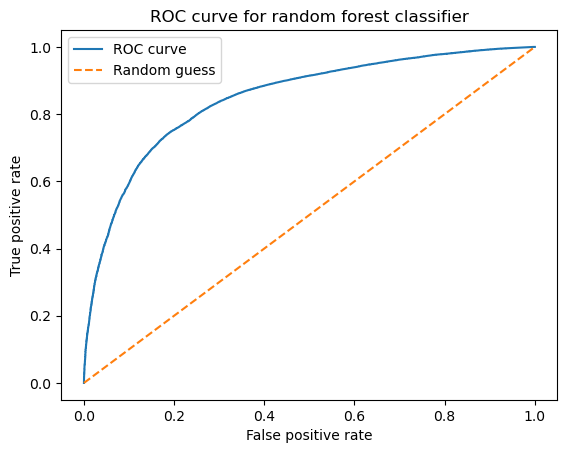

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob, sample_weight=w_test)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for random forest classifier")
plt.legend()
plt.show()